In [1]:
import pandas as pd

import calendar
import datetime

## Import data

In [2]:
data = pd.read_csv('TANKTemp060_098.csv',sep=",", header=None, names=["date", "value"])
data

,date,value
0,2015-060-00:00:30.114,18.744939
1,2015-060-00:00:30.882,18.744900
2,2015-060-00:02:38.114,18.785425
3,2015-060-00:02:38.882,18.785400
4,2015-060-00:04:46.114,18.785425
...,...,...
32117,2015-098-02:25:34.114,18.502024
32118,2015-098-02:27:42.114,18.502024
32119,2015-098-02:29:50.110,18.542510
32120,2015-098-02:31:58.114,18.542510


## Prepare data

In [3]:
data.dropna(inplace=True)
# data.reindex(data)



data.reset_index(drop=True, inplace = True)
data.head(1572)

,date,value
0,2015-060-00:00:30.114,18.744939
1,2015-060-00:00:30.882,18.744900
2,2015-060-00:02:38.114,18.785425
3,2015-060-00:02:38.882,18.785400
4,2015-060-00:04:46.114,18.785425
...,...,...
1567,2015-061-13:50:22.110,20.698925
1568,2015-061-13:50:22.877,20.698900
1569,2015-061-13:52:30.114,20.698925
1570,2015-061-13:54:38.114,20.698925


In [4]:
data['StandardTime']=0
data.head(1572)

,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,0
1,2015-060-00:00:30.882,18.744900,0
2,2015-060-00:02:38.114,18.785425,0
3,2015-060-00:02:38.882,18.785400,0
4,2015-060-00:04:46.114,18.785425,0
...,...,...,...
1567,2015-061-13:50:22.110,20.698925,0
1568,2015-061-13:50:22.877,20.698900,0
1569,2015-061-13:52:30.114,20.698925,0
1570,2015-061-13:54:38.114,20.698925,0


In [5]:
data

,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,0
1,2015-060-00:00:30.882,18.744900,0
2,2015-060-00:02:38.114,18.785425,0
3,2015-060-00:02:38.882,18.785400,0
4,2015-060-00:04:46.114,18.785425,0
...,...,...,...
32114,2015-098-02:25:34.114,18.502024,0
32115,2015-098-02:27:42.114,18.502024,0
32116,2015-098-02:29:50.110,18.542510,0
32117,2015-098-02:31:58.114,18.542510,0


In [6]:
for i in range(len(data)):
    dd=data['date'][i].split('-')
    yy=int(dd[0])
    jd=int(dd[1])
    sec=dd[2].split(':')
    ss=sec[2][:-4]
    mm=sec[2][-3:]
    month = 1
    day = 0
    while jd - calendar.monthrange(yy,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(yy,month)[1]
        month = month + 1

    data['StandardTime'][i]=datetime.datetime(yy, month, jd, int(sec[0]),int(sec[1]),int(ss),int(mm)*1000)

data.head()

D:\Anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000


In [7]:
data['epoch']=0
data.head()

,date,value,StandardTime,epoch
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,0
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,0
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,0
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,0
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,0


In [8]:
from datetime import datetime
import time

for i_m in range(len(data)):
    # convert utc -> epoch(sec)
    dd = time.mktime(data['StandardTime'][i_m].timetuple())
    ms = int(int(str(data['StandardTime'][i_m]).split('.')[1])/1000)
    # build epoch (millisec) by add microsec from utc to epoch(sec)
    ep_mil = int(str(int(dd))+str(ms))
    # add epoch (milsec) -> epoch column
    data['epoch'][i_m] = ep_mil

D:\Anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
data.head()

,date,value,StandardTime,epoch
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,1425142830114
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,1425142830882
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,1425142958114
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,1425142958882
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,1425143086114


Text(0.5, 0, 'Time')

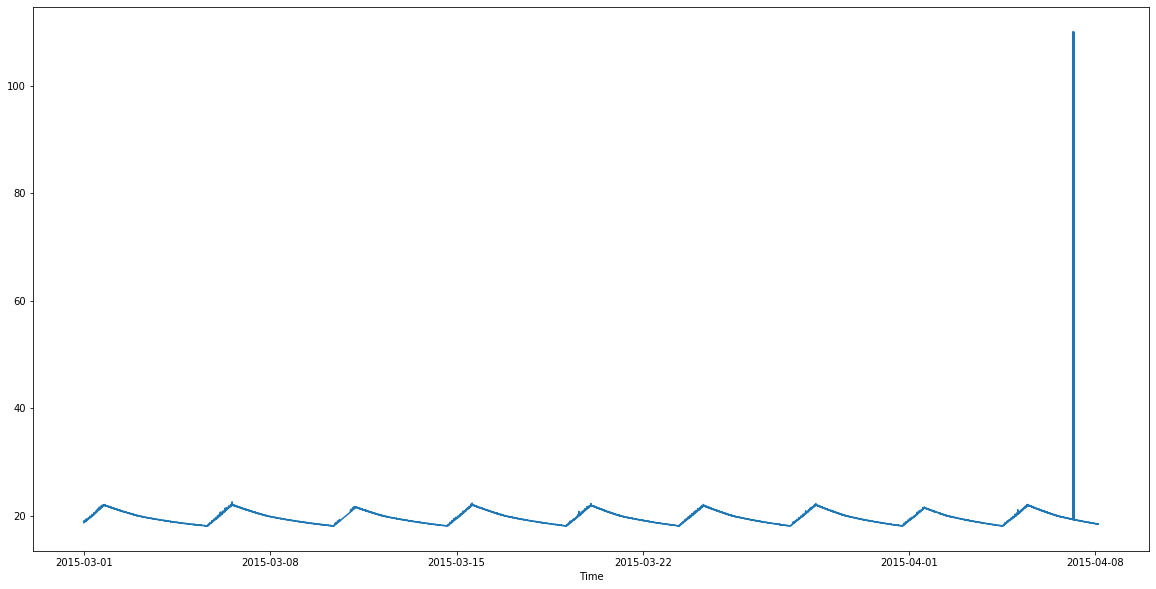

In [10]:
data['StandardTime'] = pd.to_datetime(data['StandardTime'])

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.plot(data['StandardTime'], data['value'])
plt.xlabel('Time')

In [11]:
data_sample = data.copy()

In [12]:
# remove outiler



In [13]:
qt1 = data_sample['value'].quantile([.25])
qt1=float(qt1.to_numpy())
qt3 = data_sample['value'].quantile([.75])
qt3 = float(qt3.to_numpy())

# calculate max value of boxplot
max_box = qt3+(1.5*(qt3-qt1))
max_box

23.460668

In [14]:
data_out = data_sample.copy()

In [15]:
# remove outlier
data_out.drop(data_out[data_out['value']>max_box].index, inplace=True)
data_out.reset_index(drop=True, inplace = True)

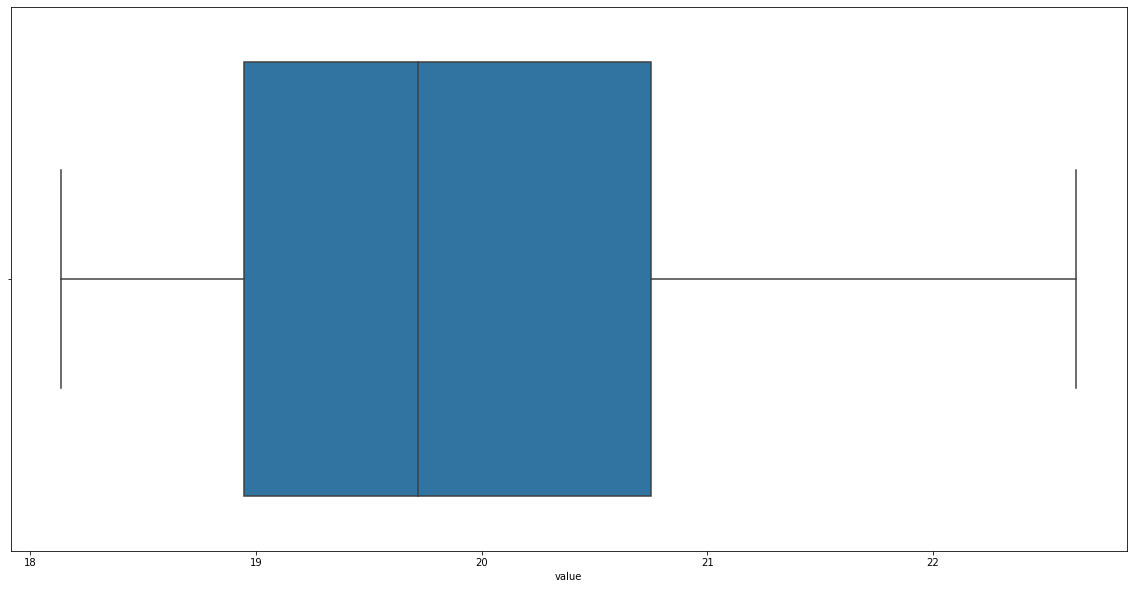

In [16]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(data_out['value'])

Text(0.5, 0, 'Time')

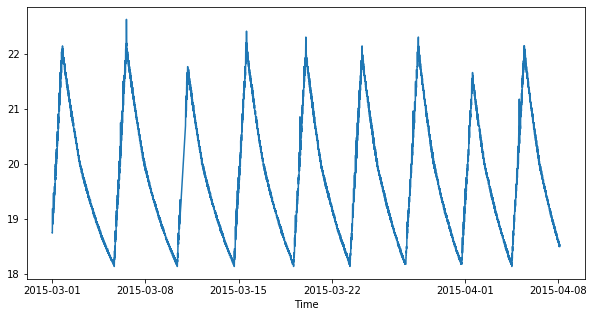

In [17]:
plt.figure(figsize=(10,5))
plt.plot(data_out['StandardTime'], data_out['value'])
plt.xlabel('Time')

In [18]:
data_out

,date,value,StandardTime,epoch
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114,1425142830114
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882,1425142830882
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114,1425142958114
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882,1425142958882
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114,1425143086114
...,...,...,...,...
32112,2015-098-02:25:34.114,18.502024,2015-04-08 02:25:34.114,1428434734114
32113,2015-098-02:27:42.114,18.502024,2015-04-08 02:27:42.114,1428434862114
32114,2015-098-02:29:50.110,18.542510,2015-04-08 02:29:50.110,1428434990110
32115,2015-098-02:31:58.114,18.542510,2015-04-08 02:31:58.114,1428435118114


D:\Anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


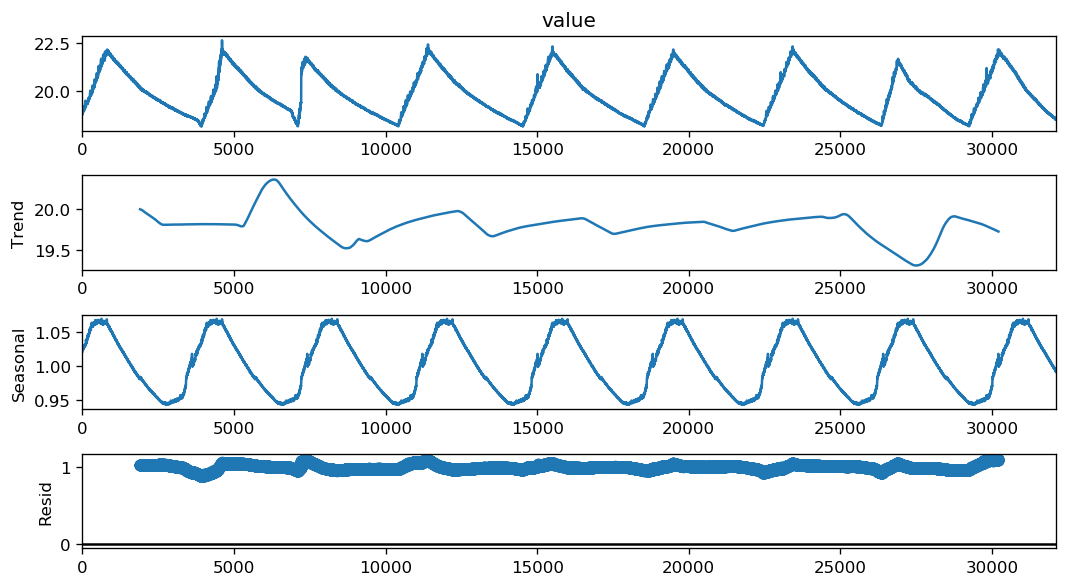

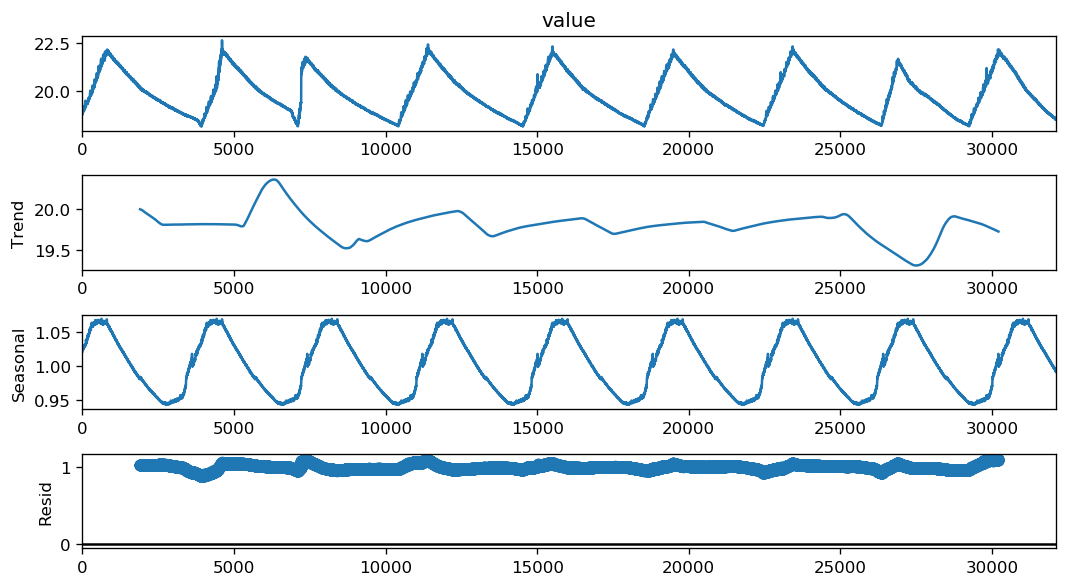

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data_out.value, model='multiplicative',freq=3800)
result.plot()


### Test for Seasonality 

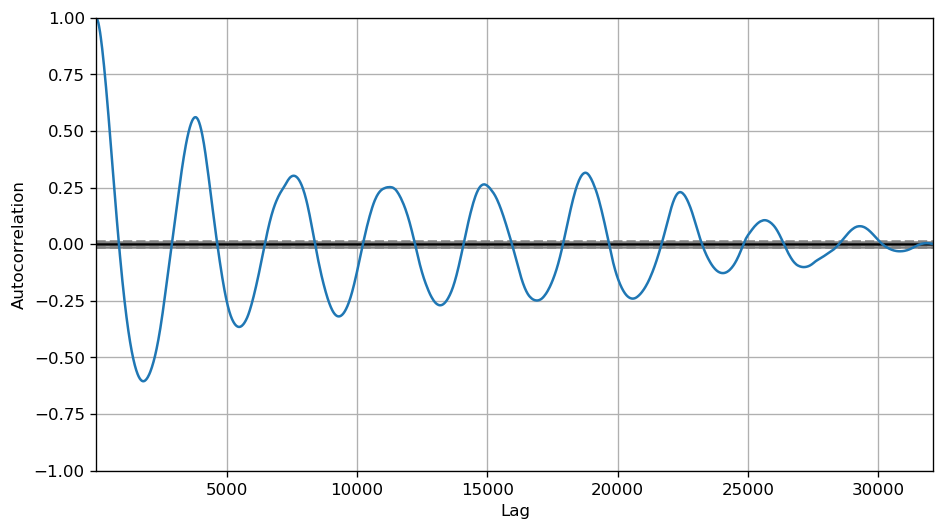

In [21]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(data_out.value.tolist())

### Decompose

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(data_out['value'], model='multiplicative', extrapolate_trend=4000)

# Additive Decomposition
result_add = seasonal_decompose(data_out['value'], model='additive', extrapolate_trend=4000)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

### Random

In [33]:
df = data_out[['value','StandardTime']]

In [34]:
df.head()

,value,StandardTime
0,18.744939,2015-03-01 00:00:30.114
1,18.744900,2015-03-01 00:00:30.882
2,18.785425,2015-03-01 00:02:38.114
3,18.785400,2015-03-01 00:02:38.882
4,18.785425,2015-03-01 00:04:46.114


In [35]:
# df1 = df.sample(frac=0.2, random_state=1)
df1 = df.sample(frac=1, random_state=1)
df1 = df1.sort_values(by='StandardTime').reset_index(drop=True)
df1 = df1.set_index('StandardTime')


In [36]:
df1

,value
StandardTime,
2015-03-01 00:00:30.114,18.744939
2015-03-01 00:00:30.882,18.744900
2015-03-01 00:02:38.114,18.785425
2015-03-01 00:02:38.882,18.785400
2015-03-01 00:04:46.114,18.785425
...,...
2015-04-08 02:25:34.114,18.502024
2015-04-08 02:27:42.114,18.502024
2015-04-08 02:29:50.110,18.542510


In [37]:
df1['StandardTime'] = pd.to_datetime(df1['StandardTime'])

KeyError: 'StandardTime'

In [38]:
type(df1['StandardTime'][1])

KeyError: 'StandardTime'

Text(0.5, 0, 'Time')

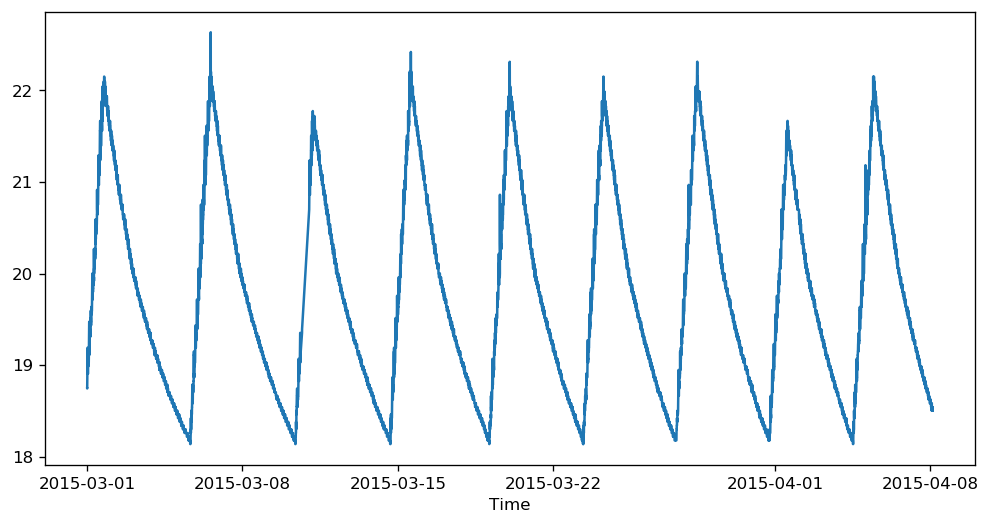

In [39]:
plt.figure(figsize=(10,5))
plt.plot(data_out['StandardTime'], data_out['value'])
plt.xlabel('Time')

Text(0.5, 0, 'Time')

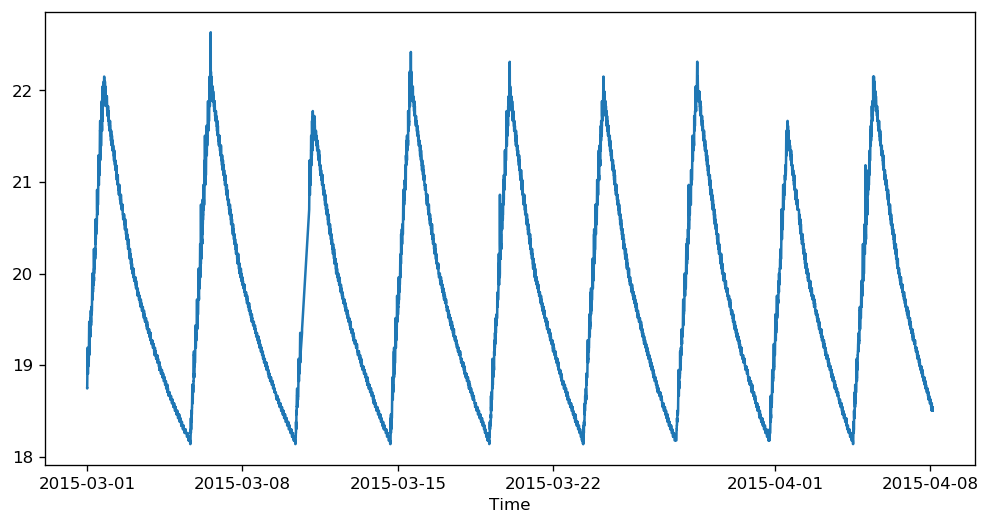

In [40]:
plt.figure(figsize=(10,5))
plt.plot( df1['value'])
plt.xlabel('Time')

In [41]:
from statsmodels.tsa.stattools import adfuller
def stationarity_test(timeseries):
    print('Augment Dicky Fuller Test : ' )
    adftest = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','P-value','#Lags','Number of Observations'])
    print('Test_ststic : '+str(adfoutput[0]))
    print('p-values : '+str(adfoutput[1]))
    print('Number of observation : '+str(adfoutput[3]))

stationarity_test(df1['value'])

Augment Dicky Fuller Test : 
Test_ststic : -2.437938656346801
p-values : 0.13131348976217322
Number of observation : 32065.0


In [42]:
d1=df['value'][:].diff(1).isnull() 
d1=df['value'][:].diff(1)[~d1]
type(d1)
d1

1       -0.000039
2        0.040525
3       -0.000025
4        0.000025
5       -0.000025
           ...   
32112    0.000000
32113    0.000000
32114    0.040486
32115    0.000000
32116   -0.040486
Name: value, Length: 32116, dtype: float64

In [43]:
from statsmodels.tsa.stattools import adfuller
def stationarity_test(timeseries):
    print('Augment Dicky Fuller Test : ' )
    adftest = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','P-value','#Lags','Number of Observations'])
    print('Test_ststic : '+str(adfoutput[0]))
    print('p-values : '+str(adfoutput[1]))
    print('Number of observation : '+str(adfoutput[3]))

stationarity_test(d1)

Augment Dicky Fuller Test : 
Test_ststic : -18.402606796635038
p-values : 2.191063760285408e-30
Number of observation : 32064.0


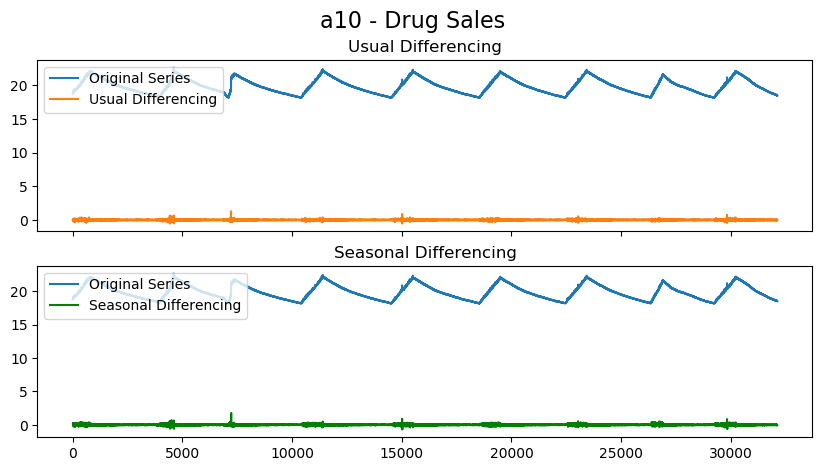

In [44]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data_out['value'][:], label='Original Series')
axes[0].plot(data_out['value'][:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data_out['value'][:], label='Original Series')
axes[1].plot(data_out['value'][:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [45]:
mm = int(len(data)/9)

In [46]:
data_out['value'][:3]

0    18.744939
1    18.744900
2    18.785425
Name: value, dtype: float64

In [ ]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df1['value'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=600,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic


In [ ]:
# Forecast
n_periods = 1
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df1.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df1)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()